In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 8.1 The Basics of Decision Trees

**8.1.1 Regression Trees**

In [3]:
Hitters = pd.read_csv("data/Hitters.csv").dropna()
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [5]:
#使用python的sklearn实现，这里与R语言结构不同
from sklearn.tree import DecisionTreeRegressor
y,X = patsy.dmatrices('np.log(Salary) ~ Years + Hits', Hitters, return_type = 'dataframe')
tree_reg = DecisionTreeRegressor(max_leaf_nodes=3)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**FIGURE 8.1**

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


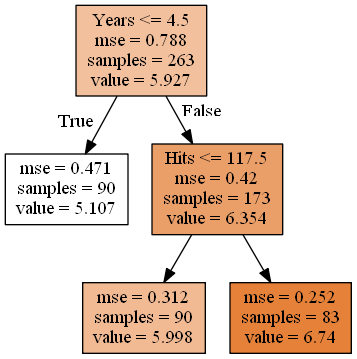

In [6]:
#实现方案1，参照https://github.com/JWarmenhoven/ISLR-python
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)
graph1, = print_tree(tree_reg, features=X.columns, class_names=y.columns)
Image(graph1.create_png())

**FIGURE 8.2**

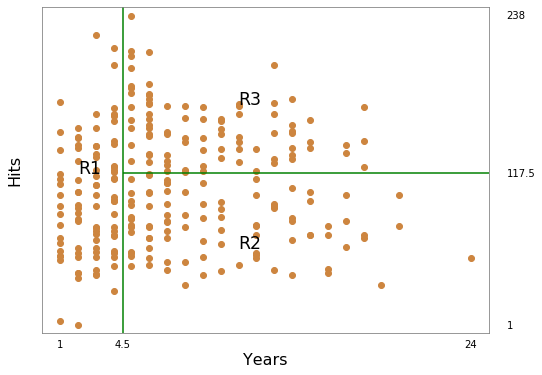

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(Hitters['Years'],Hitters['Hits'],color='peru')
plt.xlabel('Years', fontsize = 16,labelpad =20)
plt.ylabel('Hits', fontsize = 16,labelpad =20)
plt.vlines(4.5, ymin=-5, ymax=245,color = 'green')
plt.hlines(117.5, xmin=4.5, xmax=25,color = 'green')
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large')
plt.xlim(0,25)
plt.ylim(-5,245)
plt.xticks([])
plt.yticks([])
x_ticks = [1,4.5,24]
y_ticks = [1,117.5,238]
for x_tick in x_ticks:
    plt.text(x_tick,-10,x_tick,horizontalalignment='center', verticalalignment='top')
for y_tick in y_ticks:
    plt.text(26,y_tick,y_tick,horizontalalignment='left', verticalalignment='center')
ax = plt.gca()
for direction in ["left","right","top","bottom"]:
    ax.spines[direction].set_color("gray")

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Hitters, test_size = 0.5, random_state = 1)

In [9]:
y_train,X_train = patsy.dmatrices('np.log(Salary) ~ Years + RBI + PutOuts + Hits + Walks + Runs', 
                                  train_set, return_type = 'dataframe')
tree_reg = DecisionTreeRegressor(max_leaf_nodes=12, max_depth=4)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=12,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**FIGURE 8.4.**

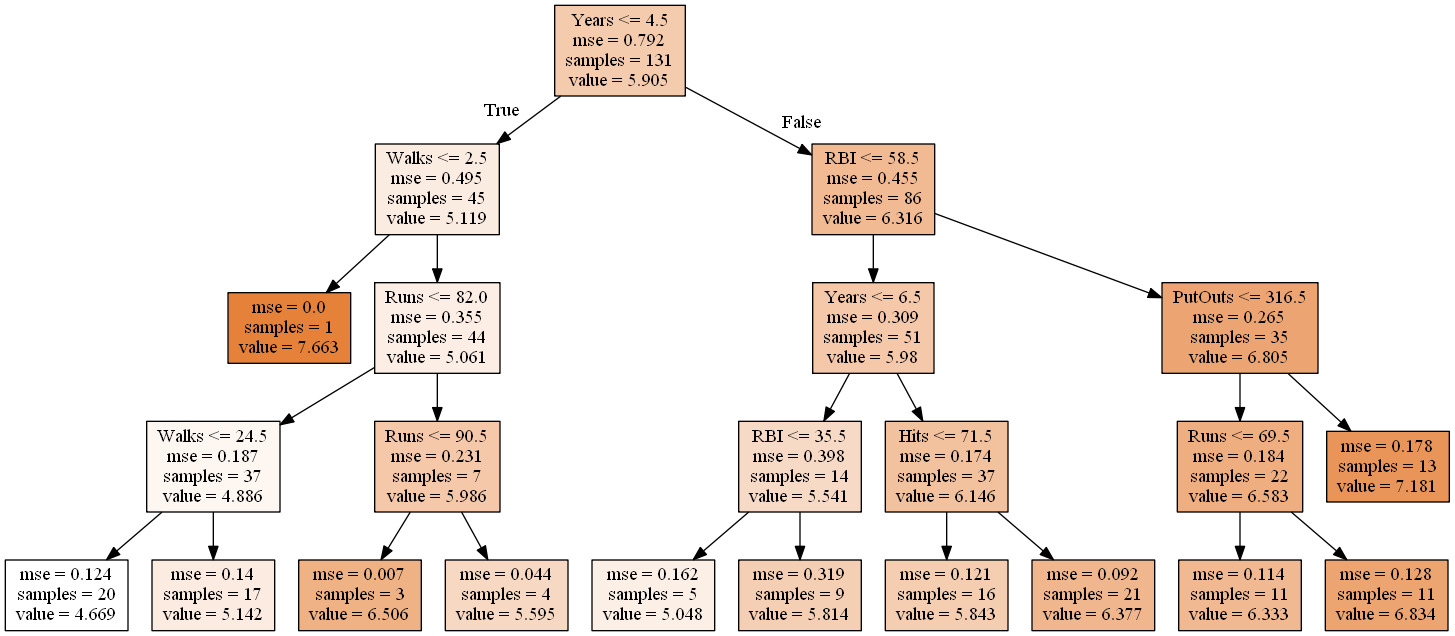

In [10]:
graph2, = print_tree(tree_reg, features=X_train.columns, class_names=y_train.columns)
Image(graph2.create_png())

**FIGURE 8.5.**

In [11]:
columns = '1'
for column in Hitters.columns:
    columns = columns + '+' + column
y_train,X_train = patsy.dmatrices('np.log(Salary) ~ {} - Salary'.format(columns),train_set, return_type = 'dataframe')
y_test,X_test = patsy.dmatrices('np.log(Salary) ~ {} - Salary'.format(columns),test_set, return_type = 'dataframe')

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
cv_mse = []
test_mse = []
train_mse = []
nodes_range = np.arange(2,11)
for nodes_num in nodes_range:
    tree_reg = DecisionTreeRegressor(max_leaf_nodes=nodes_num)
    cv_mse.append( -np.mean(cross_val_score(tree_reg,X_train,y_train,cv = 6,scoring="neg_mean_squared_error")))
    tree_reg.fit(X_train,y_train)
    test_mse.append(mean_squared_error(y_test,tree_reg.predict(X_test)))
    train_mse.append(mean_squared_error(y_train,tree_reg.predict(X_train)))

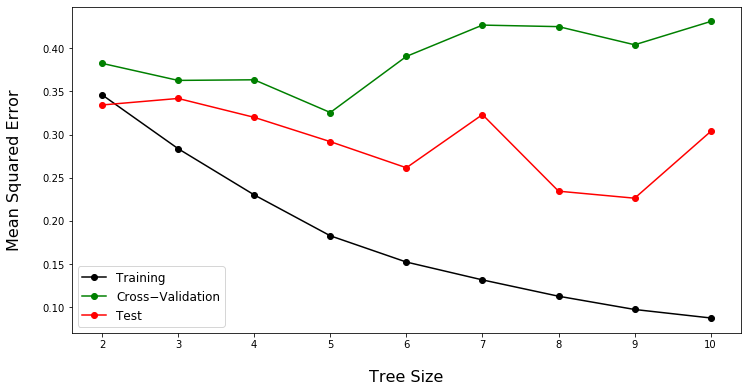

In [13]:
plt.figure(figsize=(12,6))
plt.plot(nodes_range,train_mse,'k-o',label = 'Training')
plt.plot(nodes_range,cv_mse,'g-o',label = 'Cross−Validation')
plt.plot(nodes_range,test_mse,'r-o',label = 'Test')
plt.legend(fontsize = 12)
plt.xlabel('Tree Size', fontsize = 16,labelpad =20)
plt.ylabel('Mean Squared Error', fontsize = 16,labelpad =20)
plt.show()

**8.1.2 Classification Trees**

In [14]:
Heart = pd.read_csv("data/Heart.csv").drop('Unnamed: 0', axis=1).dropna()
Heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [15]:
train_set, test_set = train_test_split(Heart, test_size = 0.5, random_state = 1)
columns = '1'
for column in Heart.columns:
    columns = columns + '+' + column
y_train,X_train = patsy.dmatrices('AHD ~ {} - AHD'.format(columns),train_set, return_type = 'dataframe')
y_test,X_test = patsy.dmatrices('AHD ~ {} - AHD'.format(columns),test_set, return_type = 'dataframe')
X_train.drop('Intercept',axis = 1,inplace= True)
X_test.drop('Intercept',axis = 1,inplace= True)

In [16]:
y_train.columns

Index(['AHD[No]', 'AHD[Yes]'], dtype='object')

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_leaf_nodes=18)
tree_clf.fit(X_train,y_train['AHD[Yes]'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**FIGURE 8.6 UPPER**

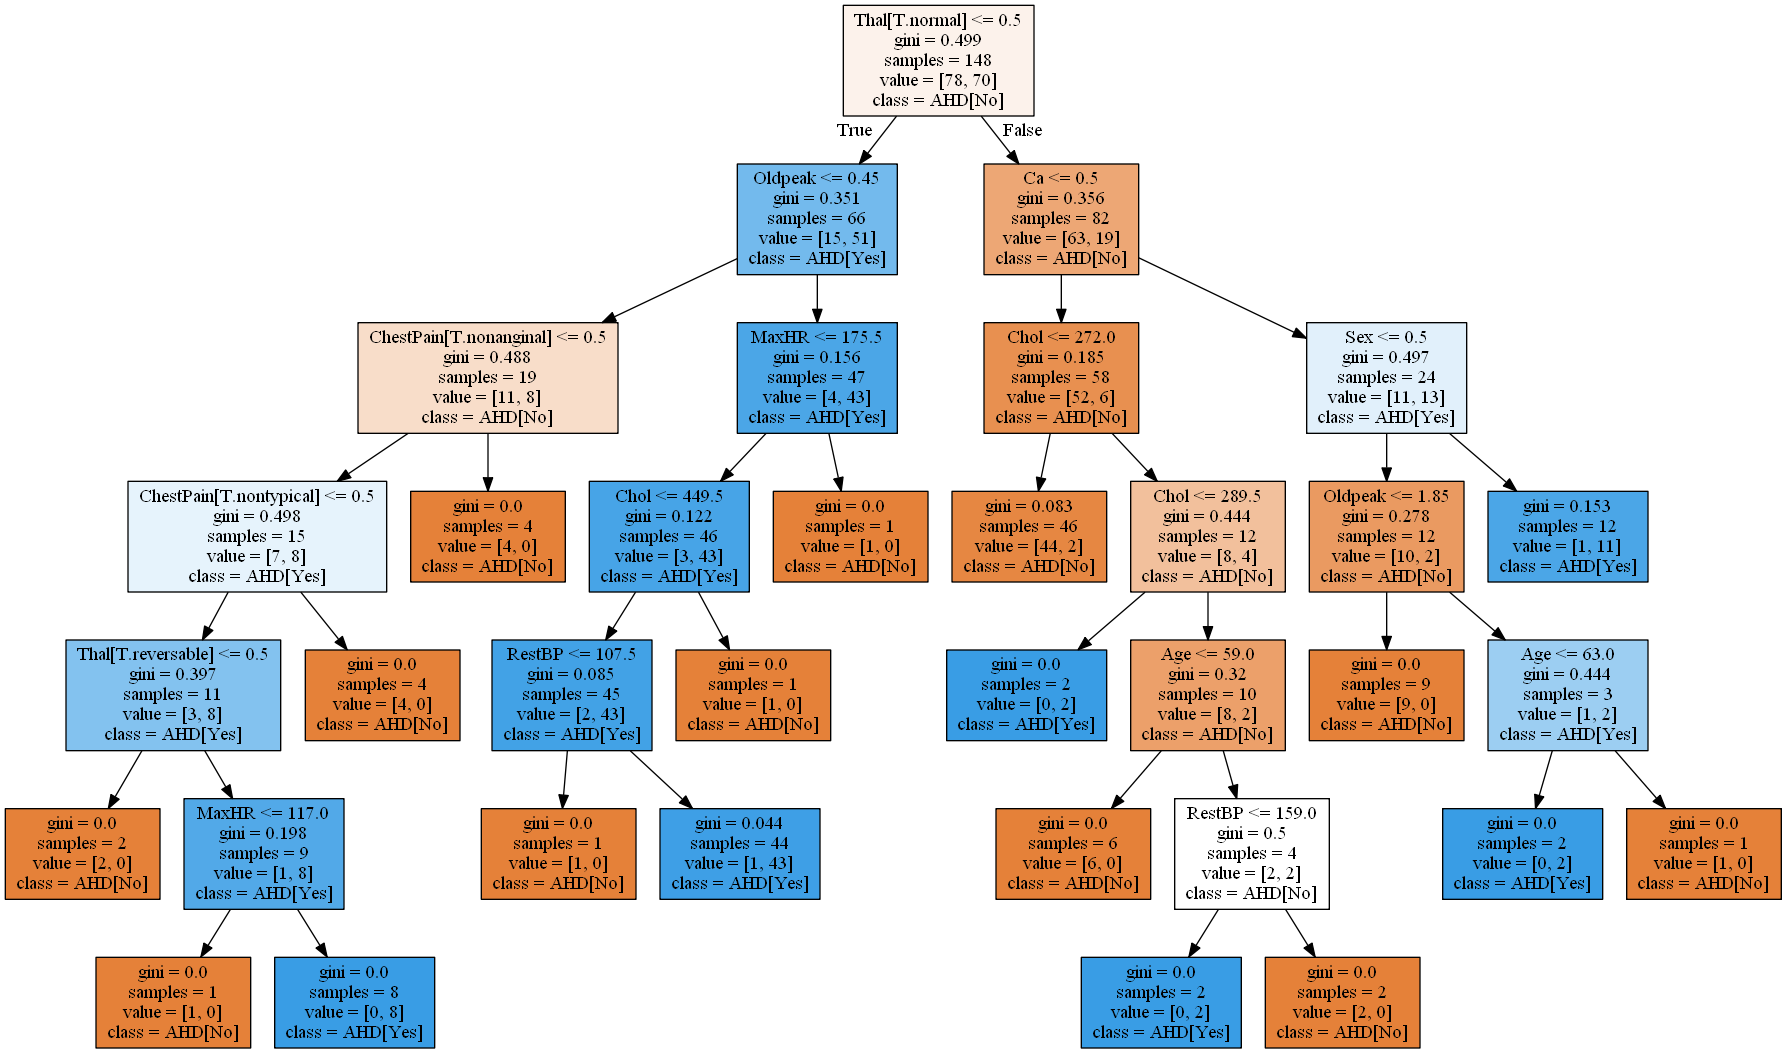

In [18]:
graph3, = print_tree(tree_clf, features=X_train.columns, class_names=y_train.columns)
Image(graph3.create_png())

**FIGURE 8.6 LEFT**

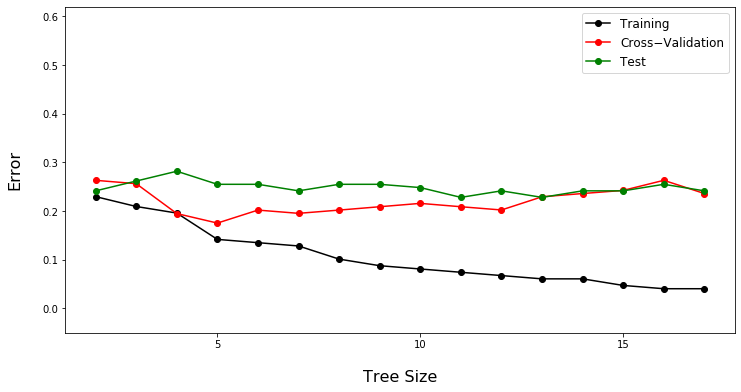

In [19]:
from sklearn.metrics import accuracy_score
cv_error = []
test_error = []
train_error = []
nodes_range = np.arange(2,18)
for nodes_num in nodes_range:
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=nodes_num)
    cv_error.append( 1 - np.mean(cross_val_score(tree_clf,X_train,y_train['AHD[Yes]'],cv = 5,scoring="accuracy")))
    tree_clf.fit(X_train,y_train['AHD[Yes]'])
    test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],tree_clf.predict(X_test)))
    train_error.append(1 - accuracy_score(y_train['AHD[Yes]'],tree_clf.predict(X_train)))
plt.figure(figsize=(12,6))
plt.plot(nodes_range,train_error,'k-o',label = 'Training')
plt.plot(nodes_range,cv_error,'r-o',label = 'Cross−Validation')
plt.plot(nodes_range,test_error,'g-o',label = 'Test')
plt.legend(fontsize = 12)
plt.ylim(-0.05,0.62)
plt.xticks([5,10,15])
plt.xlabel('Tree Size', fontsize = 16,labelpad =20)
plt.ylabel('Error', fontsize = 16,labelpad =20)
plt.show()

**FIGURE 8.6 RIGHT**

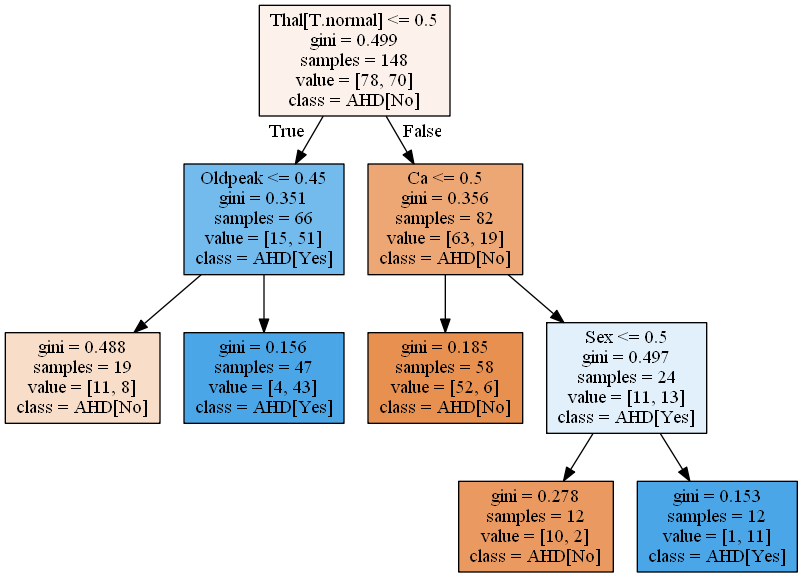

In [20]:
cv_error_pd = pd.DataFrame(cv_error,index = nodes_range)
tree_clf = DecisionTreeClassifier(max_leaf_nodes=int(cv_error_pd.idxmin()))
tree_clf.fit(X_train,y_train['AHD[Yes]'])
graph4, = print_tree(tree_clf, features=X_train.columns, class_names=y_train.columns)
Image(graph4.create_png())

# 8.2 Bagging, Random Forests, Boosting

**8.2.1 Bagging**

In [21]:
from sklearn.ensemble import RandomForestClassifier
trees_num_range = np.arange(5,301)
bag_test_error = []
rf_test_error = []
bag_oob_error = []
rf_oob_error = []
for trees_num in trees_num_range:
    bag_rf_clf = RandomForestClassifier(n_estimators=trees_num,oob_score=True,random_state=1,max_features = len(X_train.columns))
    rf_clf = RandomForestClassifier(n_estimators=trees_num,oob_score=True,random_state=1,max_features = 'sqrt')
    bag_rf_clf.fit(X_train,y_train['AHD[Yes]'])
    rf_clf.fit(X_train,y_train['AHD[Yes]'])
    bag_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],bag_rf_clf.predict(X_test)))
    rf_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],rf_clf.predict(X_test)))
    bag_oob_error.append(1 - bag_rf_clf.oob_score_)
    rf_oob_error.append(1 - rf_clf.oob_score_)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\wuj

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\wuj

**FIGURE 8.8.**

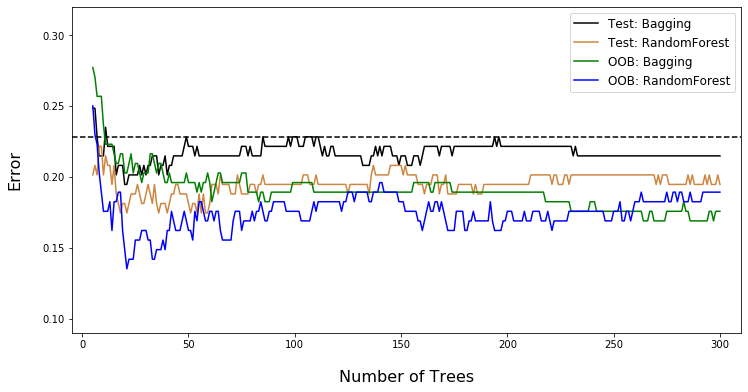

In [22]:
plt.figure(figsize=(12,6))
plt.plot(trees_num_range,bag_test_error,'k-',label = 'Test: Bagging')
plt.plot(trees_num_range,rf_test_error,color = 'peru',label = 'Test: RandomForest')
plt.plot(trees_num_range,bag_oob_error,'g-',label = 'OOB: Bagging')
plt.plot(trees_num_range,rf_oob_error,'b-',label = 'OOB: RandomForest')
plt.hlines(np.array(test_error).min(), xmin=-5, xmax=310,color = 'black',linestyles='dashed')
plt.xlim(-5,310)
plt.ylim(0.09,0.32)
plt.yticks([0.1,0.15,0.20,0.25,0.30])
plt.legend(fontsize = 12)
plt.xlabel('Number of Trees', fontsize = 16,labelpad =20)
plt.ylabel('Error', fontsize = 16,labelpad =20)
plt.show()

**8.2.2 Random Forests**

**FIGURE 8.9.**

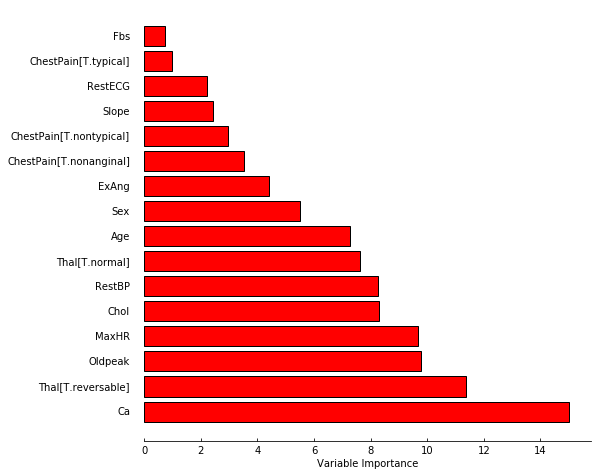

In [23]:
rf_clf = RandomForestClassifier(n_estimators=300,oob_score=True,random_state=1,max_features = 'sqrt')
rf_clf.fit(X_train,y_train['AHD[Yes]'])
feature_importance=pd.DataFrame({'feature':X_train.columns, 'importance':(rf_clf.feature_importances_ * 100).round(3)})
feature_importance.sort_values('importance', inplace=True,ascending=False)
feature_importance.set_index('feature',inplace=True)
from mpl_toolkits.axisartist.axislines import SubplotZero
fig = plt.figure(figsize=[8,8])
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
for direction in ["left","right", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)
ax.barh(feature_importance.index ,width = feature_importance['importance'],color = 'red',edgecolor = 'black')
for i in range(len(feature_importance.index)):
    ax.text(-0.5,i ,feature_importance.index[i],horizontalalignment='right', verticalalignment='center')
ax.set_xlabel('Variable Importance', fontsize = 16,labelpad =20)
plt.show()

**FIGURE 8.10**

In [24]:
#原书使用 15-class gene expression data set没有找到资源，使用Heart代替
trees_num_range = np.arange(1,501)
original_test_error = []
divided_test_error = []
sqrt_test_error = []
for trees_num in trees_num_range:
    original_rf_clf = RandomForestClassifier(n_estimators=trees_num,random_state=1,max_features = len(X_train.columns))
    divided_rf_clf = RandomForestClassifier(n_estimators=trees_num,random_state=1,max_features = 0.5)
    sqrt_rf_clf = RandomForestClassifier(n_estimators=trees_num,random_state=1,max_features = 'sqrt')
    original_rf_clf.fit(X_train,y_train['AHD[Yes]'])
    divided_rf_clf.fit(X_train,y_train['AHD[Yes]'])
    sqrt_rf_clf.fit(X_train,y_train['AHD[Yes]'])
    original_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],original_rf_clf.predict(X_test)))
    divided_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],divided_rf_clf.predict(X_test)))
    sqrt_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],sqrt_rf_clf.predict(X_test)))

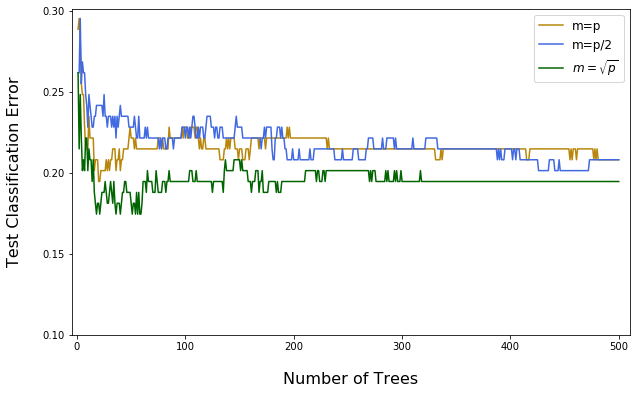

In [25]:
plt.figure(figsize=(10,6))
plt.plot(trees_num_range,original_test_error,color = 'darkgoldenrod',label = 'm=p')
plt.plot(trees_num_range,divided_test_error,color = 'royalblue',label = 'm=p/2')
plt.plot(trees_num_range,sqrt_test_error,color = 'darkgreen',label = r'$m = \sqrt{p}$')
plt.xlim(-5,510)
plt.yticks([0.1,0.15,0.20,0.25,0.30])
plt.legend(fontsize = 12)
plt.xlabel('Number of Trees', fontsize = 16,labelpad =20)
plt.ylabel('Test Classification Error', fontsize = 16,labelpad =20)
plt.show()

**8.2.3 Boosting**

**FIGURE 8.11.**

In [26]:
#原书使用 15-class gene expression data set没有找到资源，使用Heart代替
from sklearn.ensemble import GradientBoostingClassifier
trees_num_range = np.arange(1,5001)
sqrt_test_error = []
d1_test_error = []
d2_test_error = []
for trees_num in trees_num_range:
    sqrt_rf_clf = RandomForestClassifier(n_estimators=trees_num,random_state=1,max_features = 'sqrt')
    d1_gbc = GradientBoostingClassifier(n_estimators=trees_num,random_state=1, max_depth=1, learning_rate=0.01)
    d2_gbc = GradientBoostingClassifier(n_estimators=trees_num,random_state=1, max_depth=2, learning_rate=0.01)
    sqrt_rf_clf.fit(X_train,y_train['AHD[Yes]'])
    d1_gbc.fit(X_train,y_train['AHD[Yes]'])
    d2_gbc.fit(X_train,y_train['AHD[Yes]'])
    sqrt_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],sqrt_rf_clf.predict(X_test)))
    d1_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],d1_gbc.predict(X_test)))
    d2_test_error.append(1 - accuracy_score(y_test['AHD[Yes]'],d2_gbc.predict(X_test)))

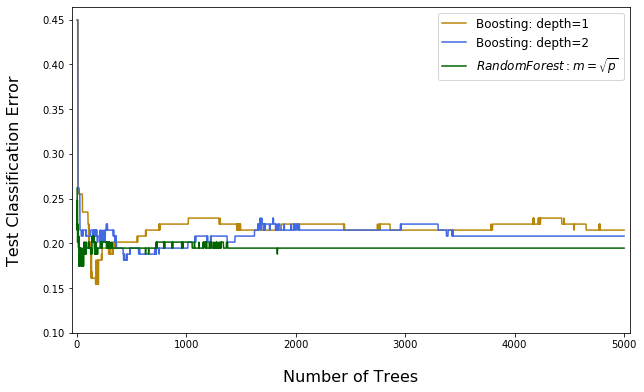

In [27]:
plt.figure(figsize=(10,6))
plt.plot(trees_num_range,d1_test_error,color = 'darkgoldenrod',label = 'Boosting: depth=1')
plt.plot(trees_num_range,d2_test_error,color = 'royalblue',label = 'Boosting: depth=2')
plt.plot(trees_num_range,sqrt_test_error,color = 'darkgreen',label = r'$RandomForest: m = \sqrt{p}$')
plt.xlim(-50,5050)
plt.yticks([0.1,0.15,0.20,0.25,0.30,0.35,0.4,0.45])
plt.legend(fontsize = 12)
plt.xlabel('Number of Trees', fontsize = 16,labelpad =20)
plt.ylabel('Test Classification Error', fontsize = 16,labelpad =20)
plt.show()